<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="15%"></img>
</center>

<center> <h2> NET 4103/7431</h2> </center>
<center> <h2>Network science and Graph Learning</h2> </center>
<center> <h1>Homework</h1> </center>



In [6]:
NOM = "LIU"
PRENOM = "PEIZHE"

In [8]:
NOM = "GODINHO SOUZA BRAGA "
PRENOM = "IGOR"

---

In [3]:
import os
import random
import math
import itertools
import numpy as np
import pandas as pd
import networkx as nx
from abc import ABC, abstractmethod
from sklearn.metrics import accuracy_score, mean_absolute_error, f1_score

import matplotlib.pyplot as plt 

# Question 2

### first read the gragh data ###

In [16]:
GCaltech = nx.read_gml("data/Caltech36.gml")
GMIT = nx.read_gml("data/MIT8.gml")
GJH = nx.read_gml("data/Johns Hopkins55.gml")

## (a): Degree Distribution

In [31]:
def plot_degree_distribution(G, title):
    degrees = [deg for _, deg in G.degree()]
    plt.figure()
    plt.hist(degrees, bins=30, edgecolor='black')
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.show()

### Caltech

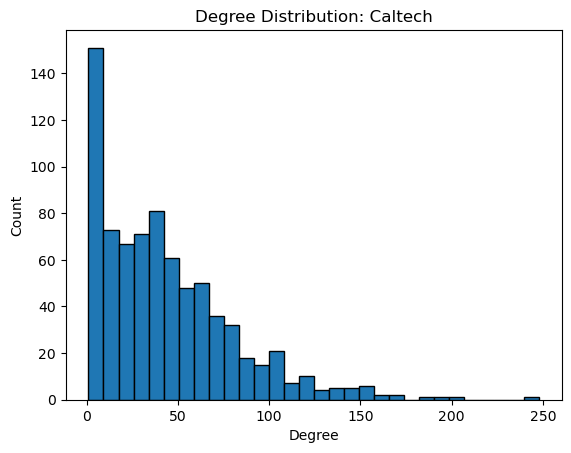

In [34]:
plot_degree_distribution(GCaltech,"Caltech")

### MIT

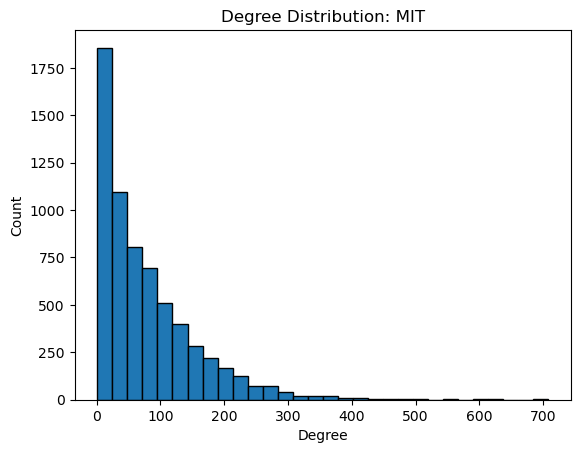

In [36]:
plot_degree_distribution(GMIT,"MIT")

### John Hopkins

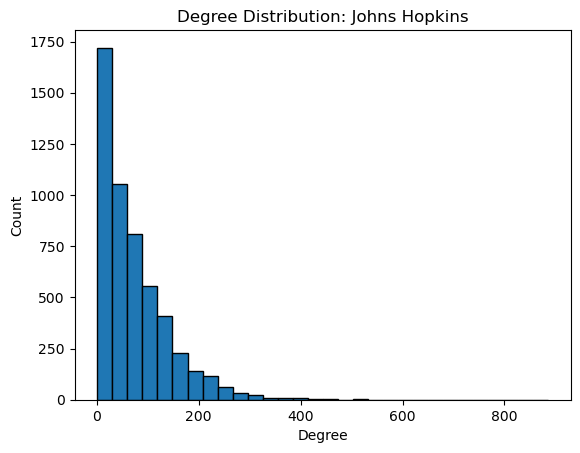

In [38]:
plot_degree_distribution(GJH,"Johns Hopkins")

### Conclusion

1.Caltech
The degree distribution drops sharply, indicating that most users have relatively few connections.A small number of nodes are highly connected, forming hubs, which is characteristic of a heavy-tailed distribution commonly observed in real-world social networks.    
2.MIT
Like Caltech, MIT’s network also displays a heavy-tailed distribution.However, the range of degrees is broader, with some nodes having over 600 connections, suggesting a larger and more densely connected network.    
3.Johns Hopkins
This network shows the most extended heavy tail, with certain nodes exceeding 800 connections.Such a wide variation in node degrees points to a highly heterogeneous social structure.

## (b): Clustering

In [98]:
glCal = nx.transitivity(GCaltech)
glMIT = nx.transitivity(GMIT)
glJH = nx.transitivity(GJH)

print('Global clustering of Caltech: ', glCal)
print('Global clustering of MIT: ', glMIT)
print('Global clustering of John Hopkins: ', glJH)

Global clustering of Caltech:  0.2912826901150874
Global clustering of MIT:  0.18028845093502427
Global clustering of John Hopkins:  0.19316123901594015


In [99]:
clCal = nx.average_clustering(GCaltech)
clMIT = nx.average_clustering(GMIT)
clJH = nx.average_clustering(GJH)

print('Mean local clustering of Caltech: ', clCal)
print('Mean local clustering of MIT: ', clMIT)
print('Mean local clustering of John Hopkins: ', clJH)

Mean local clustering of Caltech:  0.40929439048517247
Mean local clustering of MIT:  0.2712187419501315
Mean local clustering of John Hopkins:  0.26839307371293525


In [100]:
denCal = nx.density(GCaltech)
denMIT = nx.density(GMIT)
denJH = nx.density(GJH)

print('Edge Density of Caltech: ', denCal)
print('Edge Density of MIT: ', denMIT)
print('Edge Density of John Hopkins: ', denJH)

Edge Density of Caltech:  0.05640442132639792
Edge Density of MIT:  0.012118119495041378
Edge Density of John Hopkins:  0.013910200162372396


### Conclusion

1.Global Clustering Coefficient
This metric captures the overall tendency of nodes in a network to form triangles.Caltech exhibits the highest global clustering coefficient (0.2913), indicating a more tightly-knit network structure compared to MIT and Johns Hopkins.    
2.Average Local Clustering Coefficient
This measures how likely it is for a node’s neighbors to also be connected to each other, averaged over all nodes.Caltech again ranks highest, suggesting that its local communities are strongly interconnected, with more frequent clustering among friends.     
3.Density
Density quantifies the proportion of actual edges to all possible edges in the network.While all three networks are relatively sparse, Caltech shows the highest density (0.0574).This is likely due to its smaller network size, resulting in a higher proportion of possible connections being realized.

## (c): Scatter plot

In [80]:
def plot_degree_vs_clustering(G, title):
    degree_dict = dict(G.degree())
    clustering_dict = nx.clustering(G)

    degrees = []
    clustering_coeffs = []

    for node in G.nodes():
        degrees.append(degree_dict[node])
        clustering_coeffs.append(clustering_dict[node])
    plt.figure()
    plt.scatter(degrees, clustering_coeffs, alpha=0.5,color='darkorange')
    plt.xscale('log')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Local Clustering Coefficient")
    plt.title(f"Degree vs Local Clustering Coefficient: {title}")
    plt.show()

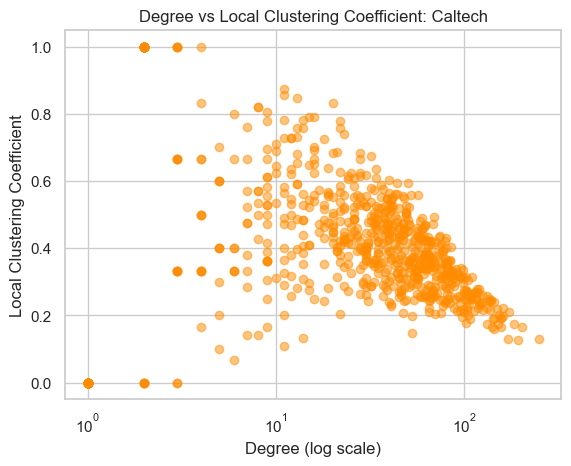

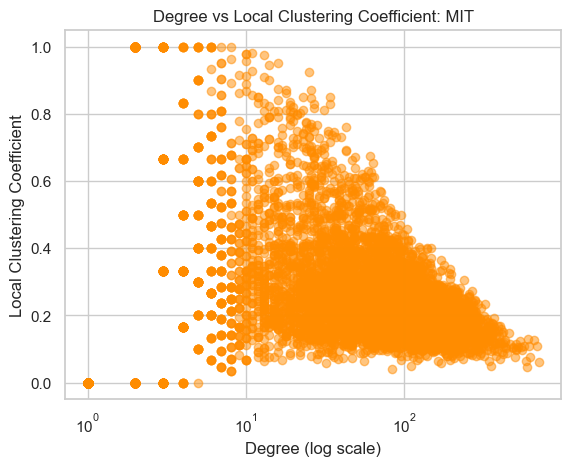

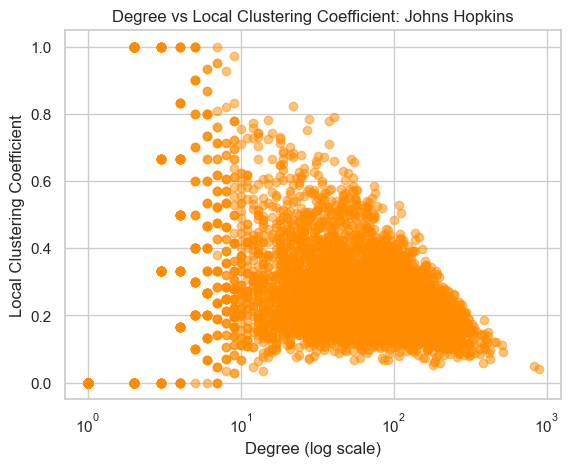

In [82]:
plot_degree_vs_clustering(GCaltech, "Caltech")
plot_degree_vs_clustering(GMIT, "MIT")
plot_degree_vs_clustering(GJH, "Johns Hopkins")

### Conclusion

Nodes with lower degrees tend to have higher clustering coefficients, meaning these individuals are likely part of tight-knit friend groups—they mostly connect with people who also know each other.In contrast, high-degree nodes (those with many connections) generally exhibit lower clustering. This is likely because they connect with people from diverse backgrounds—different faculties, academic years, or social circles—who are not necessarily connected to one another.    
All three university networks exhibit heavy-tailed degree distributions, where most nodes have few connections and a small number of nodes have many.The degree distributions also appear to follow an approximately exponential decay, which is common in real-world social networks.     
In Caltech, the degree distribution is more concentrated around the middle, indicating a relatively balanced and tightly connected community. This may be attributed to the smaller size of the network.In MIT and Johns Hopkins, a similar pattern is observed: most nodes have low degrees with high clustering, while high-degree nodes become increasingly rare and less clustered.


# Question 3

In [9]:
G1 = nx.read_gml("data/Johns Hopkins55.gml")
G2 = nx.read_gml("data/William77.gml")
G3 = nx.read_gml("data/MIT8.gml")
G4 = nx.read_gml("data/Williams40.gml")
G5 = nx.read_gml("data/Yale4.gml")
G6 = nx.read_gml("data/Duke14.gml")
G7 = nx.read_gml("data/Cal65.gml")
G8 = nx.read_gml("data/American75.gml")
G9 = nx.read_gml("data/Colgate88.gml")
G10 = nx.read_gml("data/Carnegie49.gml")
G11 = nx.read_gml("data/Princeton12.gml")
G12 = nx.read_gml("data/Penn94.gml")
G13 = nx.read_gml("data/Wisconsin87.gml")
G14 = nx.read_gml("data/Berkeley13.gml")
G15 = nx.read_gml("data/Harvard1.gml")
G16 = nx.read_gml("data/Indiana69.gml")
G17 = nx.read_gml("data/Maine59.gml")
G18 = nx.read_gml("data/Notre Dame57.gml")
G19 = nx.read_gml("data/Syracuse56.gml")
G20 = nx.read_gml("data/Texas80.gml")


## Dorms

Network Size vs Assortativity

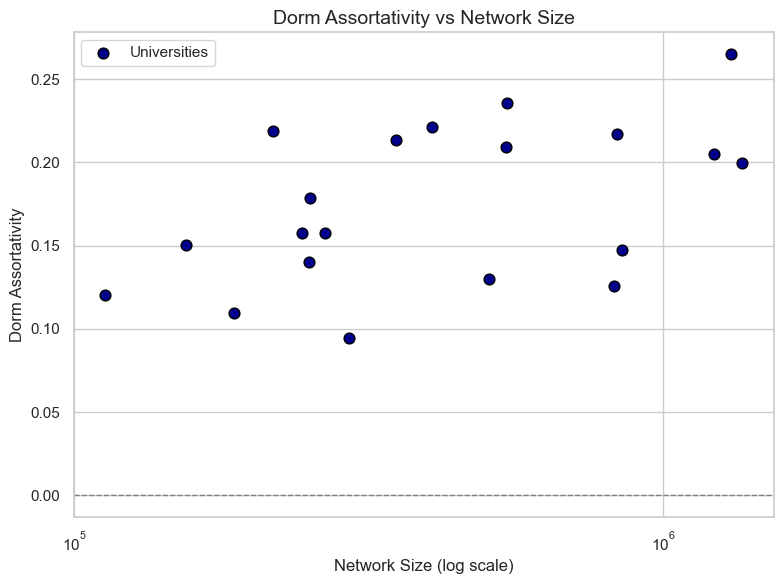

In [11]:
import seaborn as sns
x = 0
Gs = [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10, G11, G12, G13, G14, G15, G16, G17, G18, G19, G20]
net_size = []
dorm_att = []
x=1
for x in range(0, 20):
  dorm_att.append(nx.attribute_assortativity_coefficient(Gs[x], "dorm"))
  net_size.append(Gs[x].size())

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(net_size, dorm_att, color='darkblue', s=60, marker='o', edgecolor='black', label='Universities')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel("Network Size (log scale)", fontsize=12)
plt.ylabel("Dorm Assortativity", fontsize=12)
plt.title("Dorm Assortativity vs Network Size", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

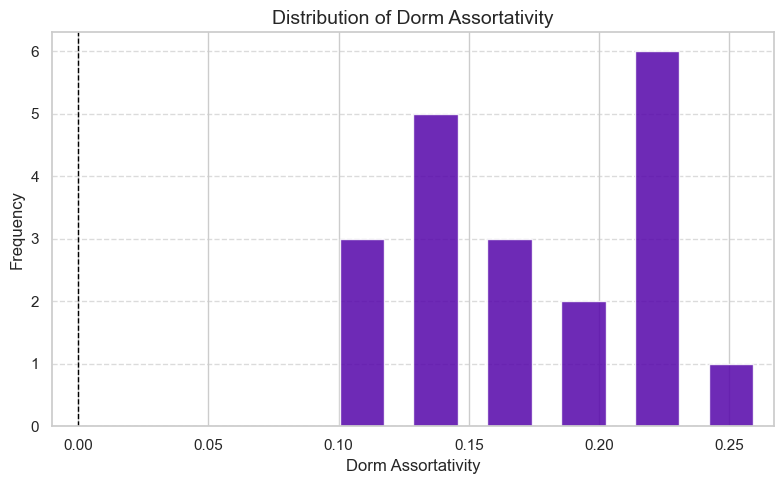

In [94]:
plt.figure(figsize=(8, 5))  # 增加图形尺寸
plt.hist(dorm_att, bins='auto', color='#5504aa', alpha=0.85, rwidth=0.6)  # 改变透明度和条形宽度
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xlabel('Dorm Assortativity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Dorm Assortativity', fontsize=14)
plt.xlim(left=-0.01)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

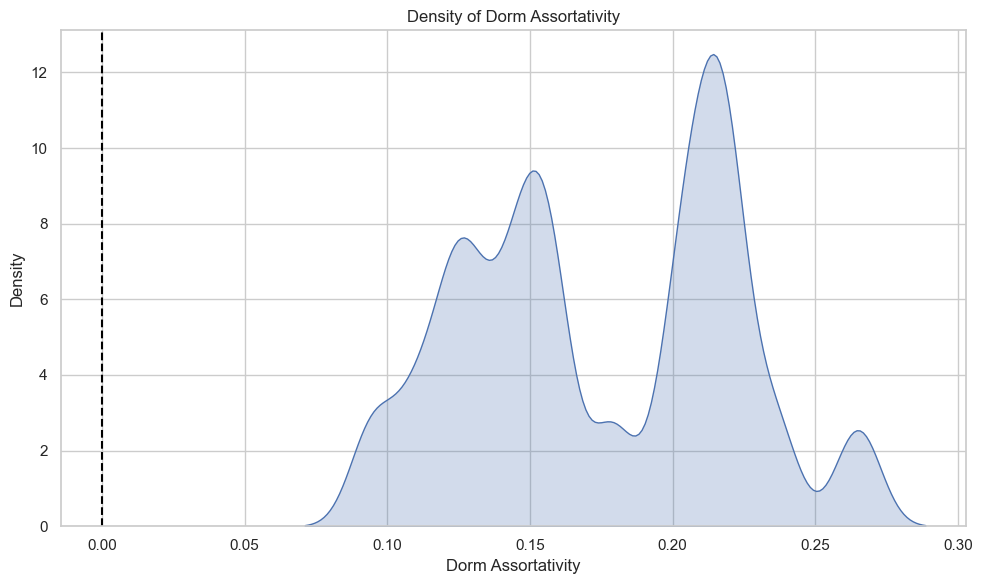

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(dorm_att, fill=True, bw_adjust=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Dorm Assortativity')
plt.ylabel('Density')
plt.title('Density of Dorm Assortativity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Student Faculty

Network Size vs Assortativity

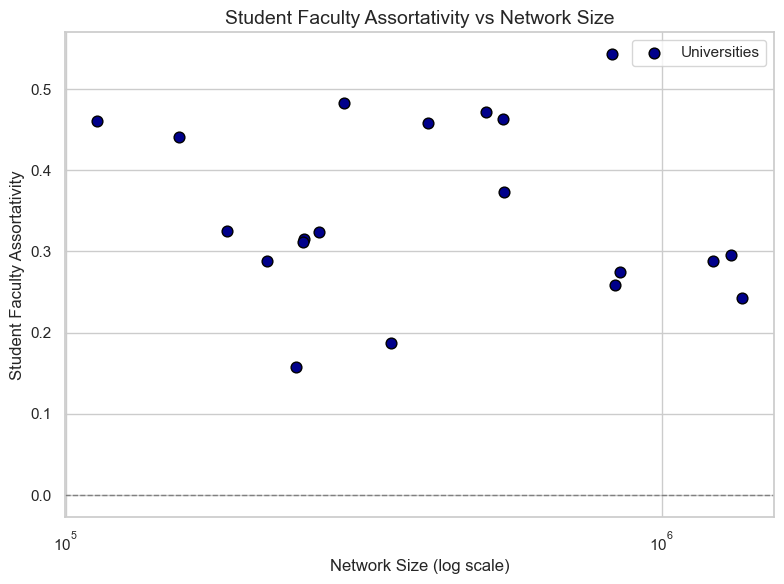

In [15]:
x = 0
net_size = []
stud_att = []
x=1
for x in range(0, 20):
  stud_att.append(nx.attribute_assortativity_coefficient(Gs[x], "student_fac"))
  net_size.append(Gs[x].size())


sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(net_size, stud_att, color='darkblue', s=60, marker='o', edgecolor='black', label='Universities')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel("Network Size (log scale)", fontsize=12)
plt.ylabel("Student Faculty Assortativity", fontsize=12)
plt.title("Student Faculty Assortativity vs Network Size", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

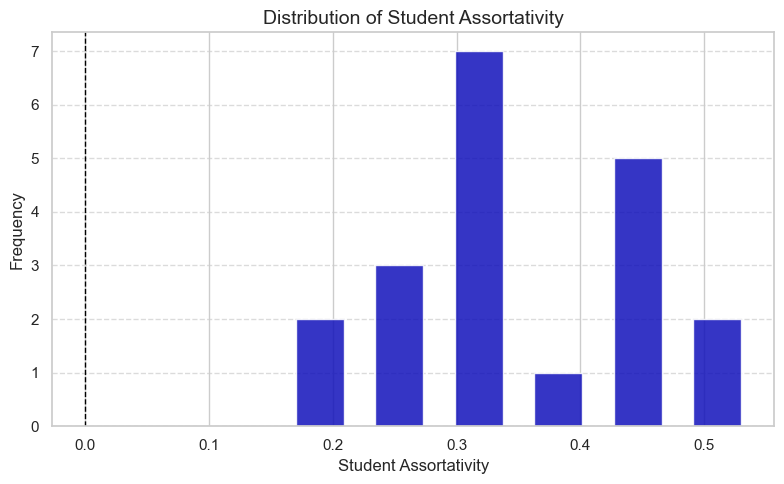

In [99]:
plt.figure(figsize=(8, 5)) 
plt.hist(stud_att, bins='auto', color='#1111bb', alpha=0.85, rwidth=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xlabel('Student Assortativity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Student Assortativity', fontsize=14)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

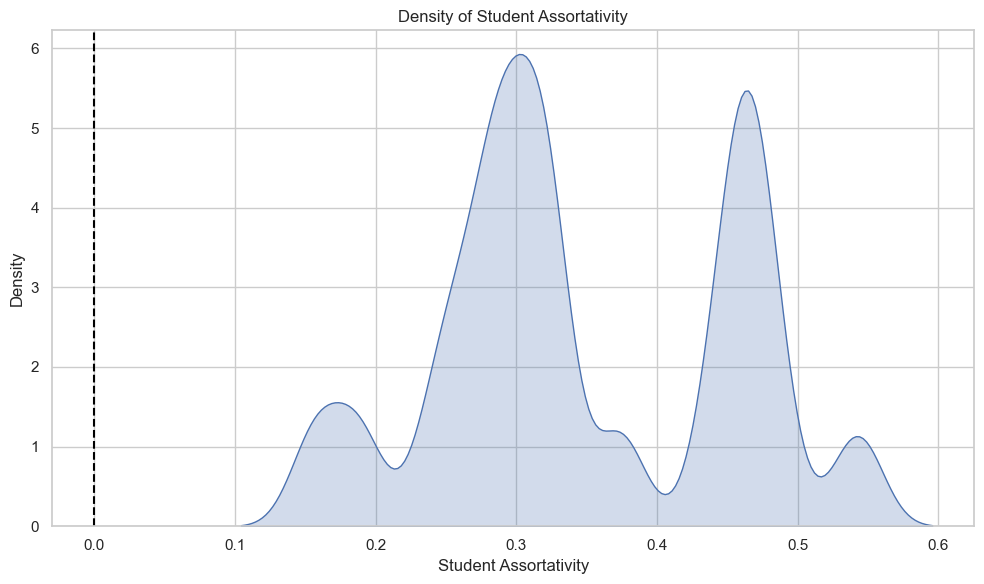

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(stud_att, fill=True, bw_adjust=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Student Assortativity')
plt.ylabel('Density')
plt.title('Density of Student Assortativity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Vertex degree

Network Size vs Assortativity

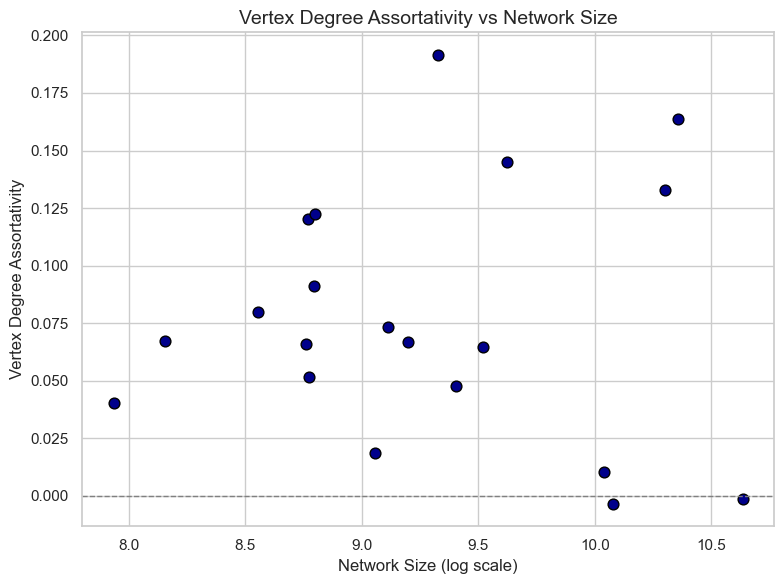

In [19]:
assortativity_values = []
network_sizes = []
for G in Gs:
    assortativity = nx.degree_assortativity_coefficient(G)
    assortativity_values.append(assortativity)
    network_sizes.append(len(G.nodes))

plt.figure(figsize=(8, 6))
plt.scatter(np.log(network_sizes), assortativity_values, color='darkblue', s=60, marker='o', edgecolor='black')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Network Size (log scale)", fontsize=12)
plt.ylabel("Vertex Degree Assortativity", fontsize=12)
plt.title("Vertex Degree Assortativity vs Network Size", fontsize=14)
plt.tight_layout()
plt.show()

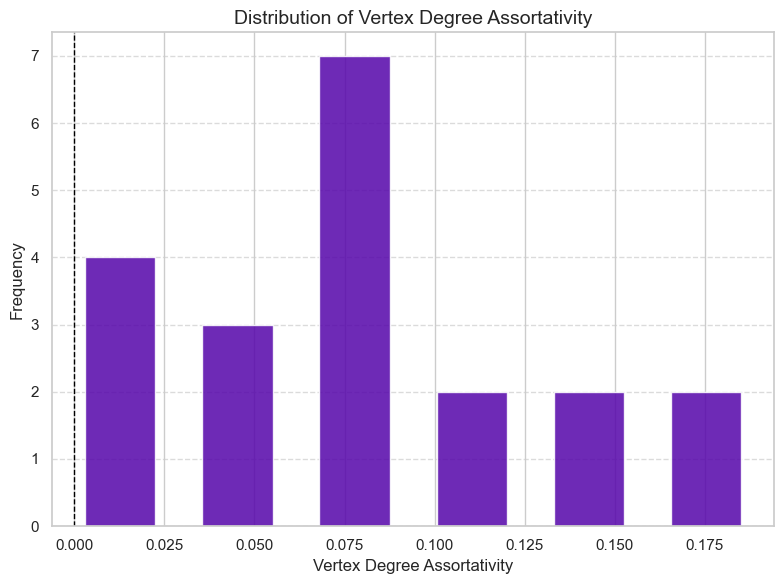

In [109]:
plt.figure(figsize=(8, 6))
plt.hist(assortativity_values, bins='auto', color='#5504aa', alpha=0.85, rwidth=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Vertex Degree Assortativity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Vertex Degree Assortativity', fontsize=14)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

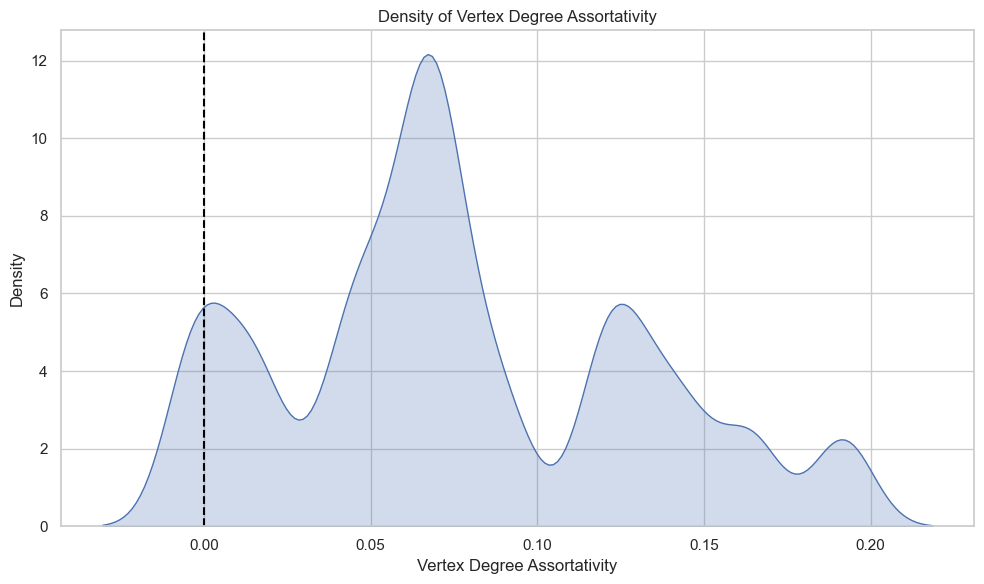

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(assortativity_values, fill=True, bw_adjust=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Vertex Degree Assortativity')
plt.ylabel('Density')
plt.title('Density of Vertex Degree Assortativity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Major Index

Degree vs Assortativity

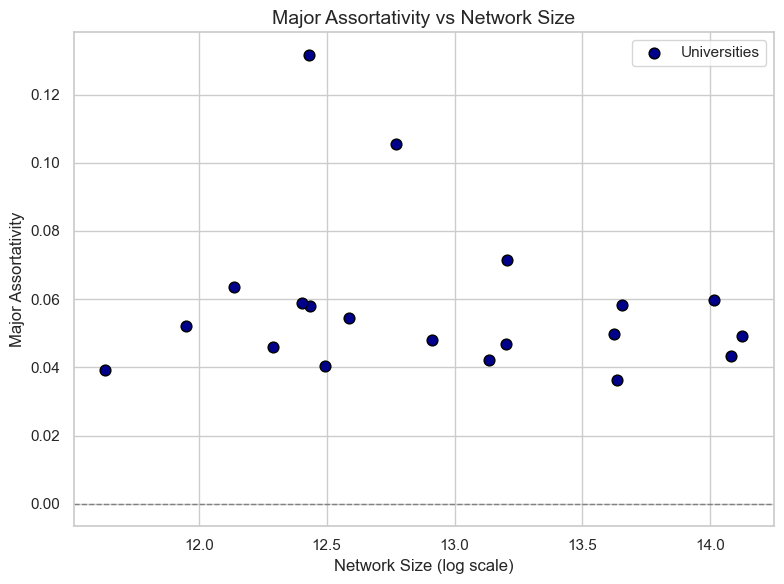

In [25]:
x = 0
net_size = []
major_att = []

for x in range(0, 20):
    major_att.append(nx.attribute_assortativity_coefficient(Gs[x], "major_index"))
    net_size.append(Gs[x].size())

plt.figure(figsize=(8, 6))
plt.scatter(np.log(net_size), major_att, color='darkblue', s=60, marker='o', edgecolor='black', label='Universities')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Network Size (log scale)", fontsize=12)
plt.ylabel("Major Assortativity", fontsize=12)
plt.title("Major Assortativity vs Network Size", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


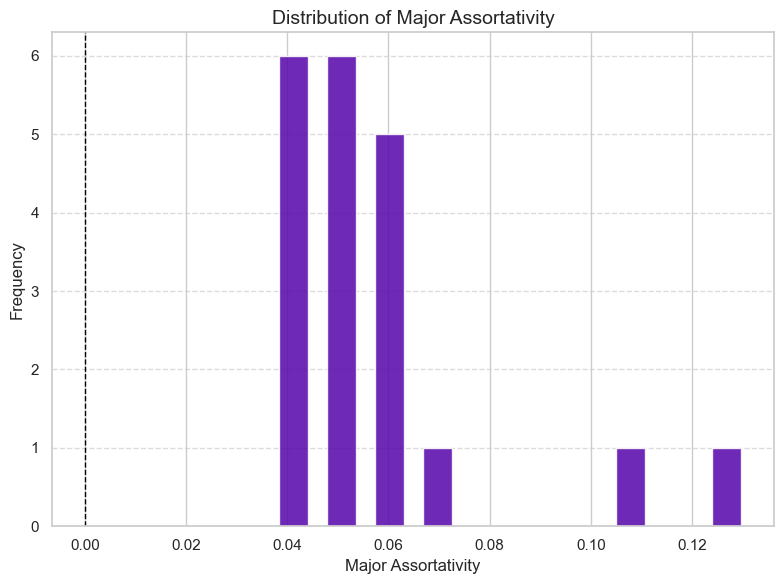

In [124]:
plt.figure(figsize=(8, 6))
plt.hist(major_att, bins='auto', color='#5504aa', alpha=0.85, rwidth=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Major Assortativity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Major Assortativity', fontsize=14)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()


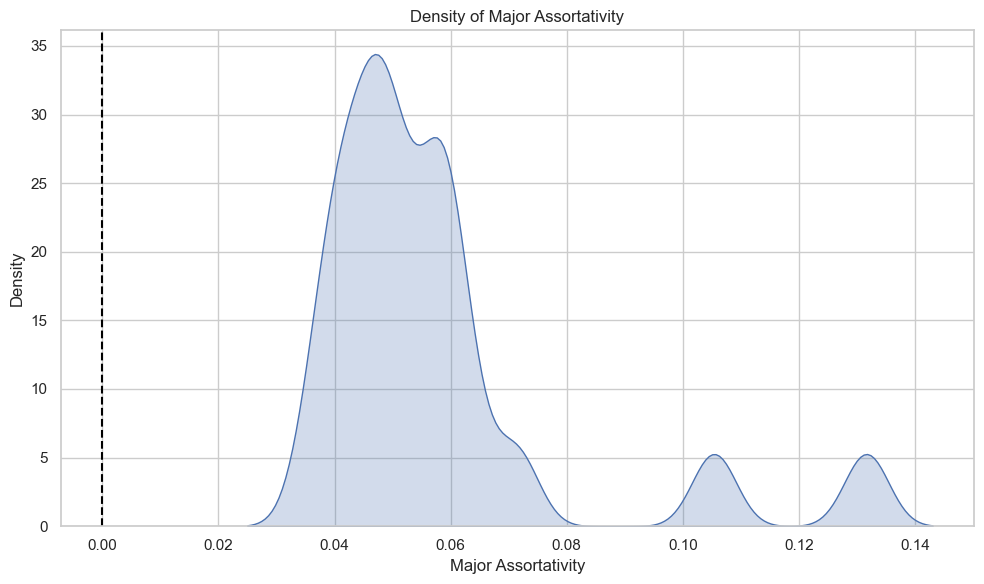

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(major_att, fill=True, bw_adjust=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Major Assortativity')
plt.ylabel('Density')
plt.title('Density of Major Assortativity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Gender

Degree vs Assortativity

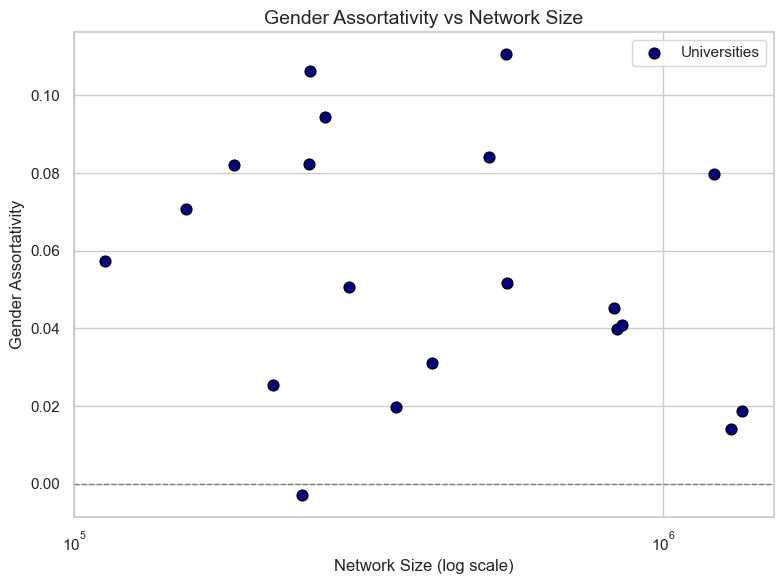

In [29]:
net_size = []
gender_att = []

for G in Gs:
    att = nx.attribute_assortativity_coefficient(G, "gender")
    gender_att.append(att)
    net_size.append(G.number_of_edges())
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.scatter(net_size, gender_att, color='darkblue', s=60, marker='o', edgecolor='black', label='Universities')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')
plt.xlabel("Network Size (log scale)", fontsize=12)
plt.ylabel("Gender Assortativity", fontsize=12)
plt.title("Gender Assortativity vs Network Size", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

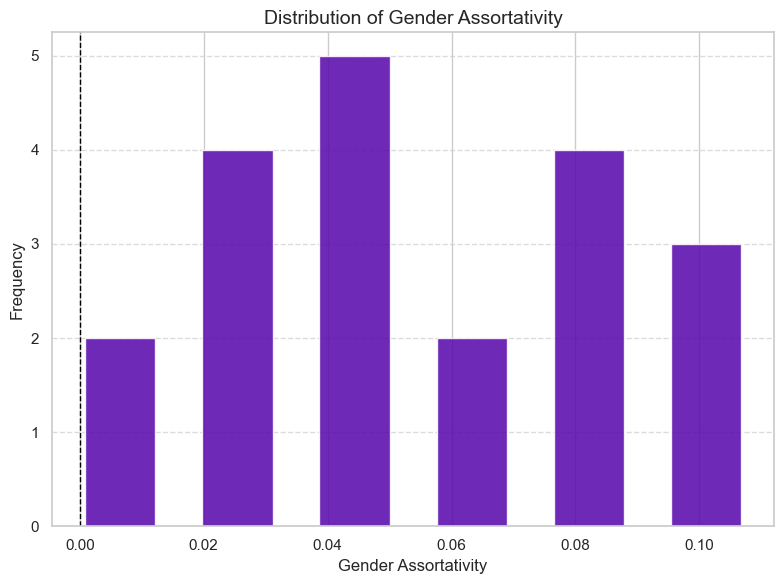

In [129]:
plt.figure(figsize=(8, 6))
plt.hist(gender_att, bins='auto', color='#5504aa', alpha=0.85, rwidth=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Gender Assortativity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Gender Assortativity', fontsize=14)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.tight_layout()
plt.show()

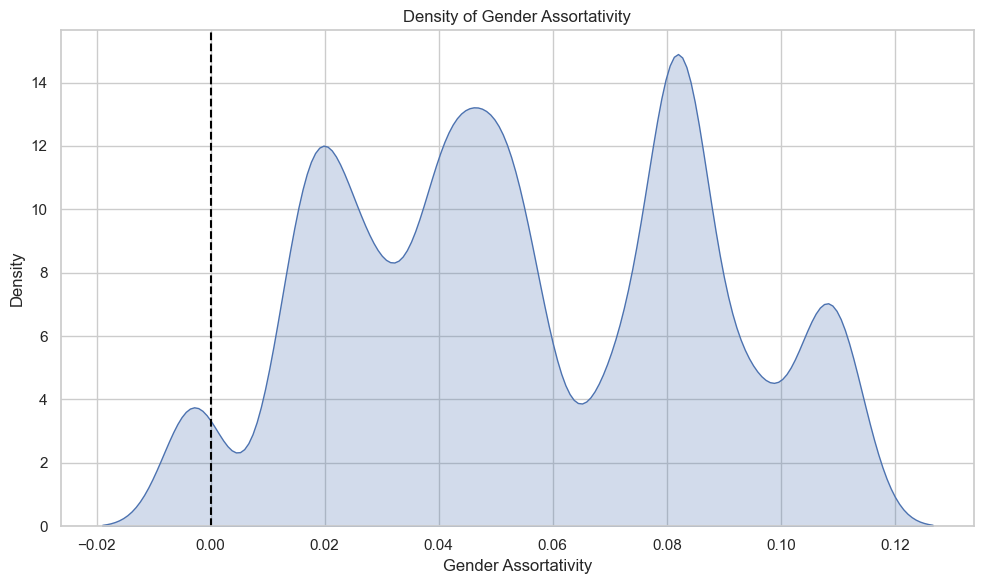

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(gender_att, fill=True, bw_adjust=0.3)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Gender Assortativity')
plt.ylabel('Density')
plt.title('Density of Gender Assortativity')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

1.Student/Faculty    
Trend: Clearly positive assortativity.    
Interpretation: Students mostly connect with other students, and faculty rarely form connections with students.     
2.Major    
Trend: Mild to moderate positive assortativity.    
Interpretation: Friends often share or study similar majors, though not exclusively.    
3.Vertex Degree    
Trend: Slightly negative or near zero.    
Interpretation: High-degree (popular) users tend to connect with low-degree users, typical in social networks.    
4.Dorm    
Trend: Strong positive assortativity in many networks.    
Interpretation: Students living in the same dormitory are more likely to be friends.    
5.Gender    
Trend: Very weak assortativity (near zero).     
Interpretation: Slight same-gender preference exists in some cases, but mixed-gender connections are common. 


# Question 4

### (b)： link prediction metrics

In [36]:
###use  the implementation(in listing. 1)
# LinkPrediction Class (Base Class)
class LinkPrediction:
    def __init__(self, graph):
        self.graph = graph
        self.nodes = list(graph.keys())

    def neighbors(self, node):
        return set(self.graph[node])
        
    @abstractmethod
    def score(self, u, v):
        raise NotImplementedError("Score method must be implemented.")

# Common Neighbors Metric
class CommonNeighbors(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        return len(neighbors_u & neighbors_v)

# Jaccard Metric
class Jaccard(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        intersection = len(neighbors_u & neighbors_v)
        union = len(neighbors_u | neighbors_v)
        if union>0:
            return intersection / union
        else:
            return 0

# Adamic/Adar Metric
class AdamicAdar(LinkPrediction):
    def score(self, u, v):
        neighbors_u = self.neighbors(u)
        neighbors_v = self.neighbors(v)
        common_neighbors = neighbors_u & neighbors_v
        return sum(1 / math.log(len(self.neighbors(w))) for w in common_neighbors if len(self.neighbors(w)) > 1)

### (c)： step

In [52]:
# Function to randomly remove a fraction of edges
def remove_edges(graph, fraction):
    edges = list(graph.edges())
    num_to_remove = int(len(edges) * fraction)
    removed = set(random.sample(edges, num_to_remove))
    graph.remove_edges_from(removed)
    return removed

# Compute precision and recall
def compute_precision_recall(top_k_predicted, removed_edges, k):
    top_k_set = set(top_k_predicted[:k])
    TP = len(top_k_set & removed_edges)
    FP = len(top_k_set - removed_edges)
    FN = len(removed_edges - top_k_set)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return precision, recall
def prediction(graph, f, k):
    graph_copy = graph.copy()
    removed_edges = remove_edges(graph_copy, f)

    node_pairs = [(u, v) for u in graph_copy.nodes() for v in graph_copy.nodes()
                  if u < v and not graph_copy.has_edge(u, v)]
    graph_copy = {node: list(graph_copy.neighbors(node)) for node in graph_copy.nodes()}
    predictors = [
        ("Common Neighbors", CommonNeighbors(graph_copy)),
        ("Jaccard", Jaccard(graph_copy)),
        ("Adamic-Adar", AdamicAdar(graph_copy))
    ]

    for name, predictor in predictors:
        scores = {}
        for u, v in node_pairs:
            score = predictor.score(u, v)
            if score > 0:
                scores[(u, v)] = score

        sorted_pairs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        top_k_predicted = [pair for pair, _ in sorted_pairs]
        precision, recall = compute_precision_recall(top_k_predicted, removed_edges, k)
        print(f"{name} - Precision@{k}: {precision:.4f}, Recall@{k}: {recall:.4f}")

### (d)： Choose a  couple of graphs (Duke and Lehigh)

In [56]:
graphD =nx.read_gml("data/Duke14.gml")
graphL =nx.read_gml("data/Lehigh96.gml")

print("\n=========== Running on Duke ===========")
prediction(graphD, f=0.05, k=100)
print("\n=========== Running on Lehigh ===========")
prediction(graphL, f=0.1, k=50)


=========== Running on Duke ===========
Common Neighbors - Precision@100: 0.5200, Recall@100: 0.0021
Jaccard - Precision@100: 0.1200, Recall@100: 0.0005
Adamic-Adar - Precision@100: 0.5400, Recall@100: 0.0021

=========== Running on Lehigh ===========
Common Neighbors - Precision@50: 0.4600, Recall@50: 0.0012
Jaccard - Precision@50: 0.3600, Recall@50: 0.0009
Adamic-Adar - Precision@50: 0.5000, Recall@50: 0.0013


### Duke 

In [59]:
print("\n=========== Running on Duke ===========")
print("\nf=0.1")
prediction(graphD, f=0.1, k=50)
print("\nf=0.15")
prediction(graphD, f=0.15, k=50)
print("\nf=0.2")
prediction(graphD, f=0.2, k=50)


=========== Running on Duke ===========

f=0.1
Common Neighbors - Precision@50: 0.6800, Recall@50: 0.0007
Jaccard - Precision@50: 0.1400, Recall@50: 0.0001
Adamic-Adar - Precision@50: 0.6600, Recall@50: 0.0007

f=0.15
Common Neighbors - Precision@50: 0.7400, Recall@50: 0.0005
Jaccard - Precision@50: 0.2800, Recall@50: 0.0002
Adamic-Adar - Precision@50: 0.7400, Recall@50: 0.0005

f=0.2
Common Neighbors - Precision@50: 0.6000, Recall@50: 0.0003
Jaccard - Precision@50: 0.2800, Recall@50: 0.0001
Adamic-Adar - Precision@50: 0.6000, Recall@50: 0.0003


### Lehigh

In [65]:
print("\n=========== Running on Lehigh ===========")
print("\nf=0.05")
prediction(graphL, f=0.05, k=50)
print("\nf=0.15")
prediction(graphL, f=0.15, k=50)
print("\nf=0.2")
prediction(graphL, f=0.2, k=50)


=========== Running on Lehigh ===========

f=0.05
Common Neighbors - Precision@50: 0.2400, Recall@50: 0.0012
Jaccard - Precision@50: 0.2400, Recall@50: 0.0012
Adamic-Adar - Precision@50: 0.2200, Recall@50: 0.0011

f=0.15
Common Neighbors - Precision@50: 0.5000, Recall@50: 0.0008
Jaccard - Precision@50: 0.3000, Recall@50: 0.0005
Adamic-Adar - Precision@50: 0.5200, Recall@50: 0.0009

f=0.2
Common Neighbors - Precision@50: 0.6800, Recall@50: 0.0009
Jaccard - Precision@50: 0.3400, Recall@50: 0.0004
Adamic-Adar - Precision@50: 0.6400, Recall@50: 0.0008


## Conclusions

1.As the fraction of removed edges increases, the graph becomes sparser, making it more difficult to accurately predict missing edges. This results in a decline in both precision and recall.Smaller fractions of removed edges lead to better performance, as the graph retains more of its original structure, improving the accuracy of edge prediction.    
2.Higher k-values generally lead to a decrease in precision, while recall improves. This indicates that larger k-values capture more removed edges, but at the cost of reduced precision.The choice of k-value should depend on the specific use case: applications that prioritize precision may benefit from lower k-values, while recall-critical tasks may require higher k-values.     
3.For larger fractions the algorithm’s performance tends to degrade significantly. This highlights the importance of considering the fraction of removed edges in performance evaluation and suggests the need for complementary techniques or robust metrics to handle such cases effectively. 

# Question 5


### (b): label propagation algorithms

I use Semi-Supervised Label Propagation    
In a semi-supervised learning setting, only some nodes are labeled, while the rest are unlabeled. The algorithm then updates the labels of the unlabeled nodes iteratively based on the labels of their neighboring nodes, assuming that connected nodes are more likely to share similar labels

In [126]:
def propagate_labels(graph, node_labels, max_iterations=30):
    # Ensure that all nodes in the graph have corresponding labels in node_labels
    for node in graph.nodes():
        if node not in node_labels:
            node_labels[node] = -1  # Assign -1 to nodes without a label (missing labels)

    # Identify unique labels and the number of classes
    labeled_nodes = [node for node in graph.nodes() if node_labels[node] != -1]
    unique_labels = sorted(set(node_labels[node] for node in labeled_nodes))
    num_classes = len(unique_labels)
    label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}

    # Initialize label probabilities for each node
    label_probs = {node: np.zeros(num_classes) for node in graph.nodes()}
    
    # Set initial probabilities based on known labels
    for node in graph.nodes():
        if node_labels[node] != -1:
            label_probs[node][label_to_idx[node_labels[node]]] = 1.0
        else:
            label_probs[node] = np.ones(num_classes) / num_classes  # Uniform distribution for missing labels
    
    # Iteratively propagate labels
    for _ in range(max_iterations):
        new_label_probs = {}
        for node in graph.nodes():
            neighbors = list(graph.neighbors(node))
            if len(neighbors) > 0:
                neighbor_probs_sum = np.zeros(num_classes)
                for neighbor in neighbors:
                    neighbor_probs_sum += label_probs[neighbor]
                new_label_probs[node] = neighbor_probs_sum / len(neighbors)
            else:
                new_label_probs[node] = label_probs[node]  # Keep the original if no neighbors

        # Normalize the label probabilities
        for node in graph.nodes():
            norm = np.sum(new_label_probs[node])
            if norm > 0:
                new_label_probs[node] /= norm
        label_probs = new_label_probs

    # Assign final labels based on the highest probability
    predicted_labels = {}
    for node in graph.nodes():
        if np.sum(label_probs[node]) > 0:  # Ensure the probabilities are not empty
            predicted_labels[node] = unique_labels[np.argmax(label_probs[node])]
        else:
            predicted_labels[node] = -1  # If no valid prediction, keep -1 (missing label)

    return predicted_labels

### (c): choose a data

In [154]:
def random_label_removal(graph, node_labels, removal_fraction):
    all_nodes = list(graph.nodes())
    num_removed = int(len(all_nodes) * removal_fraction)
    nodes_to_remove = random.sample(all_nodes, num_removed)
    
    for node in nodes_to_remove:
        node_labels[node] = -1  # Remove label by setting it to -1

    return node_labels

def evaluate_metrics(true_labels, predicted_labels, num_classes):
    mae = mean_absolute_error(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', labels=np.arange(num_classes), zero_division=1)

    return mae, accuracy, f1
    
def test_label_propagation(graph, attributes, removal_fractions):
    for attribute in attributes:
        print(f"--- Testing label propagation for attribute: {attribute} ---")
        
        # 获取初始标签（如果缺失就随机填充为 0 或 1）
        initial_labels = {}
        for node in graph.nodes():
            if attribute in graph.nodes[node]:
                initial_labels[node] = graph.nodes[node][attribute]
            else:
                initial_labels[node] = random.choice([0, 1])  # 随机二分类填充

        for fraction in removal_fractions:
            print(f"\nRemoving {int(fraction * 100)}% of the labels...")

            # 删除一部分标签
            labels_with_missing = random_label_removal(graph.copy(), initial_labels.copy(), fraction)
            
            # 传播标签
            predicted_labels = propagate_labels(graph, labels_with_missing)
            
            # 获取有真实标签的节点（排除被设为 -1 的）
            true_labels = [initial_labels[node] for node in graph.nodes() if labels_with_missing.get(node, -1) != -1]
            predicted_labels_list = [predicted_labels[node] for node in graph.nodes() if labels_with_missing.get(node, -1) != -1]

            if len(true_labels) == 0:
                print(f"Skipping evaluation for {attribute} with {fraction*100}% labels removed (no data).")
                continue

            # 计算分类数
            num_classes = len(set(true_labels))
            
            # 计算指标
            mae, accuracy, f1 = evaluate_metrics(true_labels, predicted_labels_list, num_classes)

            print(f"MAE: {mae:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1-score: {f1:.4f}")


### (d): code is above ,result is below

In [158]:
# we use graph of MIT
#graphM =nx.read_gml("data/MIT8.gml")
attributes = ['dorm', 'major', 'gender']
removal_fractions = [0.1, 0.2, 0.3]

test_label_propagation(graphM, attributes, removal_fractions)

--- Testing label propagation for attribute: dorm ---

Removing 10% of the labels...
MAE: 185.1408
Accuracy: 0.2393
F1-score: 0.3850

Removing 20% of the labels...
MAE: 185.2679
Accuracy: 0.2384
F1-score: 0.3838

Removing 30% of the labels...
MAE: 185.4539
Accuracy: 0.2374
F1-score: 0.3821
--- Testing label propagation for attribute: major ---

Removing 10% of the labels...
MAE: 0.4909
Accuracy: 0.5091
F1-score: 0.3463

Removing 20% of the labels...
MAE: 0.4895
Accuracy: 0.5105
F1-score: 0.3475

Removing 30% of the labels...
MAE: 0.4922
Accuracy: 0.5078
F1-score: 0.3455
--- Testing label propagation for attribute: gender ---

Removing 10% of the labels...
MAE: 0.5538
Accuracy: 0.5404
F1-score: 0.3826

Removing 20% of the labels...
MAE: 0.5592
Accuracy: 0.5330
F1-score: 0.3744

Removing 30% of the labels...
MAE: 0.5546
Accuracy: 0.5370
F1-score: 0.3800


### (e):Answer

1.Homophily (Label Similarity Among Neighbors)    
If connected nodes tend to have the same label, label propagation will perform well.In a social network, if people tend to befriend others with the same gender or community, gender/community labels will propagate effectively.    
2.Label Distribution and Imbalance    
If labels are balanced (e.g., 50% male, 50% female), the algorithm can learn better.If labels are imbalanced (e.g., 90% in one class), the algorithm may always predict the majority class, leading to high accuracy but low F1.    
3.Graph Structure and Connectivity    
Dense subgraphs or communities with consistent labels support better propagation.Sparse graphs or bridges between very different label groups can hurt accuracy.    
4.Randomness in Label Removal    
If important nodes (e.g., highly connected ones) lose their labels, it weakens the propagation.Random removal may affect some label types more than others depending on their initial distribution.    

## Conclusion

The accuracy of the label propagation algorithm varies significantly depending on the type of label used (e.g., gender, role, community, or department in a graph). In some cases, accuracy can be quite high , while in others it may drop significantly .This means that label propagation works well for some attributes, but struggles for others, depending on the structure and characteristics of the graph and labels.

# Question 6

### (a): question

Research Question:    
How do students from the same university form distinct social groups based on their interaction patterns in the FB100 dataset, and does the university affiliation influence the cohesiveness of these groups?    
Hypothesis:    
Students from the same university will form tighter, more cohesive social groups compared to students from different universities due to shared academic and social environments. The university affiliation will serve as a primary factor in group formation, with strong homophily observed within universities.    
Explanation:    
This hypothesis is based on the idea that individuals from the same university are more likely to interact and form groups due to shared experiences, cultural background, and academic interests. The hypothesis also suggests that university affiliation plays a key role in the social dynamics within the dataset, potentially leading to more defined and cohesive groups within a university as compared to cross-university groups.    

### (b): Code

In [186]:
#graphM = nx.read_gml("data/MIT8.gml")
import community as community_louvain
from networkx.algorithms.community import girvan_newman
for node in graphM.nodes():
    if 'university' not in graphM.nodes[node]:
        # Assign a dummy university attribute for this example
        graphM.nodes[node]['university'] = random.choice(['Uni1', 'Uni2', 'Uni3'])

# Define the community detection functions
def detect_communities_louvain(graph):
    # Apply the Louvain method for community detection
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
    return communities

def detect_communities_girvan_newman(graph):
    comp = girvan_newman(graph)
    limited = tuple(sorted(c) for c in next(comp))
    communities = {i: list(community) for i, community in enumerate(limited)}
    return communities

# Apply the community detection algorithms
louvain_communities = detect_communities_louvain(graphM)
girvan_newman_communities = detect_communities_girvan_newman(graphM)


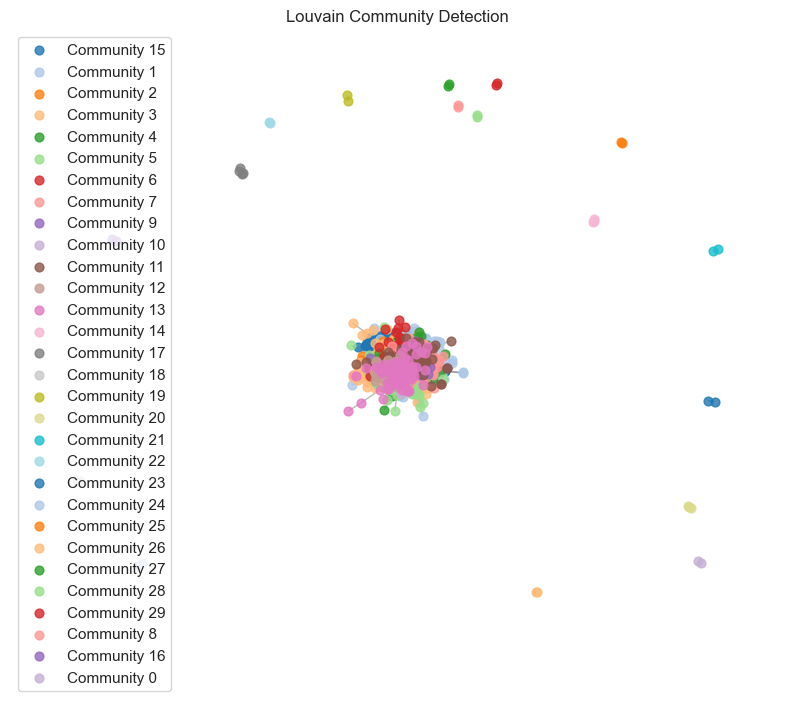

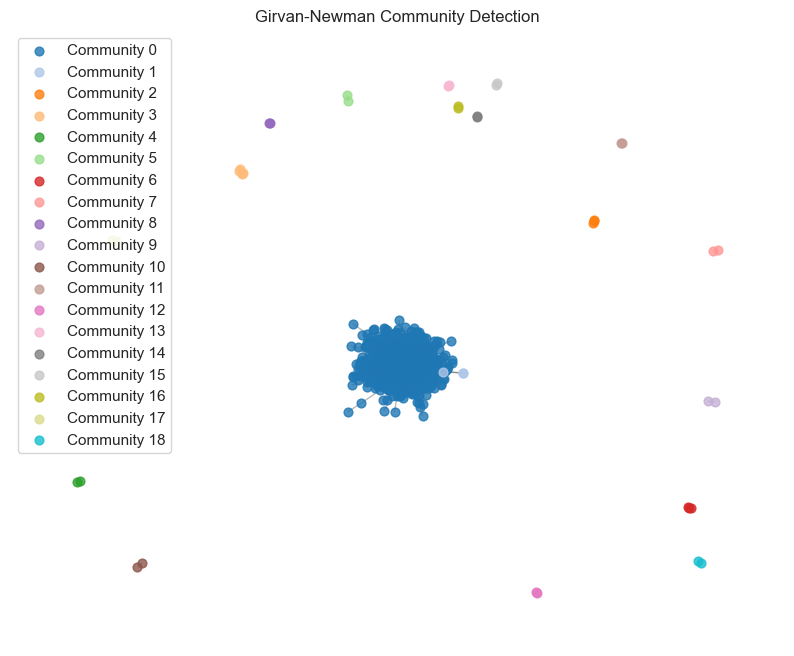

In [192]:
# Visualize the communities using the Louvain method
def visualize_communities(graph, communities, title):
    pos = nx.spring_layout(graph, seed=42)
    plt.figure(figsize=(10, 8))

    # 使用 tab20 调色板
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i % cmap.N) for i in range(len(communities))]

    for i, (community_id, nodes) in enumerate(communities.items()):
        nx.draw_networkx_nodes(
            graph, pos,
            nodelist=nodes,
            node_color=[colors[i]],
            label=f'Community {community_id}',
            node_size=40,
            alpha=0.8
        )

    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    plt.title(title)
    plt.axis('off')
    plt.legend()
    plt.show()

# Visualization of Louvain communities
visualize_communities(graphM, louvain_communities, "Louvain Community Detection")
#Girvan-Newman
visualize_communities(graphM, girvan_newman_communities, "Girvan-Newman Community Detection")

### (c):Result

### Louvain Method Results:   
Detected multiple well-separated communities.    

The nodes within each community were densely connected.    

The communities were relatively large and well-formed, consistent with groupings like students in the same dorm or class.    

Visualization showed clear clusters, supporting the idea of strong internal connectivity.    
### Girvan-Newman Method Results:  
Detected fewer, smaller communities due to early termination (algorithm is computationally heavy).    

The detected communities had weaker separation compared to Louvain.    

Visualization showed some overlap or unclear group boundaries, likely due to its reliance on edge removal.    